In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
data=pd.read_csv("height-weight.csv")

In [33]:
data

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [34]:
data.shape

(23, 2)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [36]:
data.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


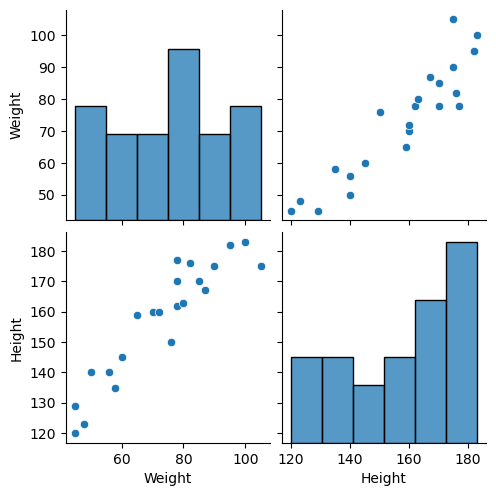

In [37]:
import seaborn as sb
sb.pairplot(data)

In [38]:
#independent featuees  and dependentent 
X=data[['Weight']] # df or 2dim array( np.array(X)

In [39]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [40]:
y=data['Height'] #series or 1 d

In [41]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [42]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [43]:
X_train.shape

(17, 1)

In [44]:
y_train.shape

(17,)

In [45]:
#standardization
from sklearn.preprocessing import StandardScaler


In [46]:
scaler=StandardScaler()

In [47]:
X_train= scaler.fit_transform(X_train)

In [48]:
X_test=scaler.transform(X_test)

In [50]:
X_train,X_test

(array([[-0.87662801],
        [ 1.66773133],
        [ 0.33497168],
        [-1.48242785],
        [ 1.36483141],
        [-1.6641678 ],
        [-0.75546804],
        [-0.1496682 ],
        [ 0.21381171],
        [-1.36126788],
        [-0.99778797],
        [-0.02850823],
        [ 1.06193149],
        [ 0.57729161],
        [ 0.75903157],
        [ 0.88019153],
        [ 0.45613165]]),
 array([[ 0.33497168],
        [ 0.33497168],
        [-1.6641678 ],
        [ 1.36483141],
        [-0.45256812],
        [ 1.97063125]]))

In [51]:
#apply linear regression
from sklearn.linear_model import LinearRegression

In [54]:
regression=LinearRegression(n_jobs=-1)

In [55]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [56]:
regression

LinearRegression(n_jobs=-1)

In [58]:
regression.coef_,regression.intercept_

(array([17.2982057]), 156.47058823529412)

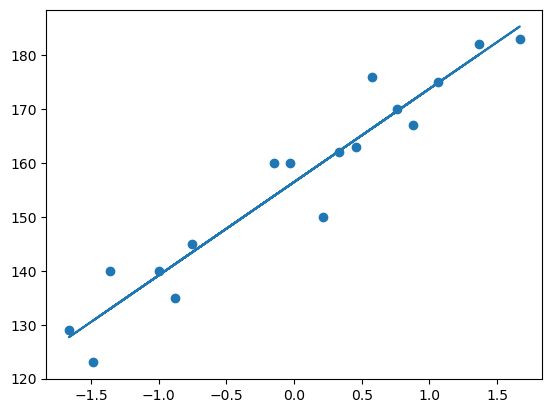

In [60]:
#plot train data for best fit
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [61]:
#prediction for test
y_pred=regression.predict(X_test)


In [62]:
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

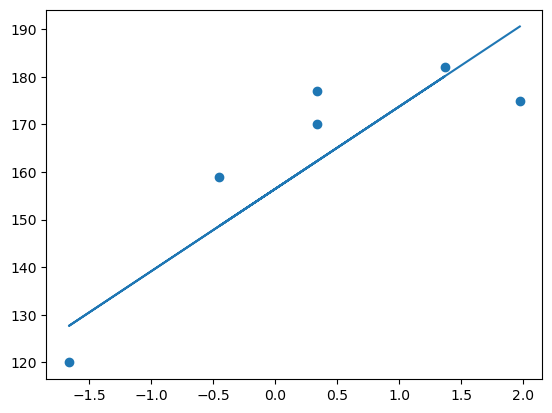

In [67]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)

In [70]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [69]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
mse,mae,rmse


(114.84069295228699, 9.665125886795005, 10.716374991212605)

In [71]:
 #R^2
score=r2_score(y_test,y_pred)
score

0.7360826717981276

In [74]:
#OLS
import statsmodels.api as sm


In [77]:
model=sm.OLS(y_train,X_train).fit()

In [78]:
prediction=model.predict(X_test)

In [79]:
prediction

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [80]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 02 Oct 2024   Prob (F-statistic):                       0.664
Time:                        19:33:41   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\ariha\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
